In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [45]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

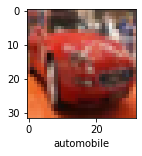

In [46]:
plot_sample(X_train, y_train, 5)

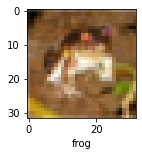

In [41]:
plot_sample(X_train, y_train, 0)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 71s 35ms/step - loss: 1.9319 - accuracy: 0.3032
Epoch 2/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.6443 - accuracy: 0.4223
Epoch 3/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5479 - accuracy: 0.4512
Epoch 4/5
1563/1563 [==============================] - 76s 48ms/step - loss: 1.4849 - accuracy: 0.4769
Epoch 5/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4339 - accuracy: 0.4955


In [15]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.5800 - accuracy: 0.4308


[1.5800096988677979, 0.4307999908924103]

In [17]:
cnn = models.Sequential([
    
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
    
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax'),
])

In [18]:
cnn.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [19]:
cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 33s 17ms/step - loss: 1.7548 - accuracy: 0.3526
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2187 - accuracy: 0.5722
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.0670 - accuracy: 0.6233
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9844 - accuracy: 0.65750s - loss: 0.9845 
Epoch 5/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9337 - accuracy: 0.6739
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8775 - accuracy: 0.6943
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8305 - accuracy: 0.7101
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7995 - accuracy: 0.7191
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7744 - accuracy: 0.7272
Epoch 10/10
1563/1563 [=======================

In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9314 - accuracy: 0.6859


[0.9314018487930298, 0.6858999729156494]

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.03941346e-03, 1.36885163e-03, 4.03358648e-03, 8.59857738e-01,
        1.15082134e-03, 1.03313684e-01, 1.36009287e-02, 1.34536633e-04,
        1.02946293e-02, 1.20570767e-03],
       [1.46548562e-02, 2.05103964e-01, 7.04584454e-06, 1.08247286e-06,
        5.01416616e-06, 5.48857315e-07, 1.37436572e-07, 2.60366151e-09,
        7.79465675e-01, 7.61684205e-04],
       [4.25834320e-02, 1.90569431e-01, 2.40531564e-03, 8.71460512e-03,
        1.09188370e-02, 3.50914686e-03, 7.02267222e-04, 9.39476129e-04,
        7.17991292e-01, 2.16662139e-02],
       [8.19893122e-01, 7.21127763e-02, 7.35286176e-02, 6.09459530e-05,
        1.67650788e-03, 5.76316052e-06, 3.22608626e-04, 6.28713815e-06,
        3.23409475e-02, 5.22549708e-05],
       [1.21900587e-06, 3.19449573e-05, 1.38583826e-02, 4.10737582e-02,
        2.48821333e-01, 1.67653291e-03, 6.94376647e-01, 3.03577544e-05,
        1.06992979e-04, 2.27722558e-05]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [30]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

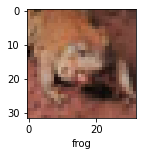

In [37]:
plot_sample(X_test,y_test,5)

In [38]:
classes[y_classes[5]]

'frog'